## Set up

In [1]:
# Upgrade pip
!pip install --upgrade pip

In [11]:
!pip install --user google-cloud-bigquery==3.4.1
!pip install --user pandas
!pip install google-cloud-bigquery
!pip install google-cloud-bigquery-storage
!pip install pyarrow
!pip install db-dtypes
!pip install tqdm
!pip install matplotlib

  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 3.6 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [22]:
from google.cloud import bigquery
from tqdm import tqdm
import matplotlib.pyplot as plt

In [13]:
bq_client = bigquery.Client(project='bqml-sandbox-396011')
dataset_id = 'bqml-sandbox-396011.BQ_ML_ID'

In [14]:
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


## Baseline model

In [17]:
%%bigquery
CREATE OR REPLACE MODEL
`bqml-sandbox-396011.BQ_ML_ID.BASE_LOGISTIC_REGRESSION`
OPTIONS
  (
    MODEL_TYPE="LOGISTIC_REG",
    INPUT_LABEL_COLS = ["card_default"]
  )
AS
SELECT * EXCEPT (ID)
FROM`bqml-sandbox-396011.BQ_ML_ID.CUSTOMER_DEFAULT_TRAINING_DATA` 


/home/codespace/.local/lib/python3.10/site-packages/google/cloud/bigquery/job/query.py:1687: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  query_result = wait_for_query(self, progress_bar_type, max_results=max_results)


""


In [19]:
%%bigquery base_logistic_regression_history
SELECT * FROM ML.TRAINING_INFO(MODEL BQ_ML_ID.BASE_LOGISTIC_REGRESSION);

/home/codespace/.local/lib/python3.10/site-packages/google/cloud/bigquery/job/query.py:1687: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  query_result = wait_for_query(self, progress_bar_type, max_results=max_results)
/home/codespace/.local/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2007: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


In [20]:
base_logistic_regression_history

,training_run,iteration,loss,eval_loss,learning_rate,duration_ms
0,0,6,0.311232,0.333257,0.8,1929
1,0,5,0.316705,0.334272,3.2,2043
2,0,4,0.326023,0.349421,3.2,1972
3,0,3,0.358358,0.378984,1.6,2242
4,0,2,0.409292,0.430342,0.8,2277
5,0,1,0.486581,0.501053,0.4,2223
6,0,0,0.590563,0.596649,0.2,1880


Some of these columns are obvious although what do the non-specific ML columns mean (specific to BQML)?

**training_run** - Will be zero for a newly created model. If the model is re-trained using warm_start, this will increment for each re-training.

**iteration** - Number of the associated training_run, starting with zero for the first iteration.

**duration_ms** - Indicates how long the iteration took (in ms).


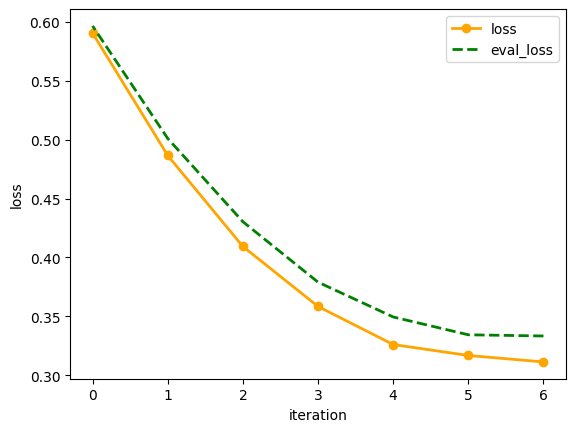

In [24]:
plt.plot('iteration', 'loss', data=base_logistic_regression_history,
         marker='o', color='orange', linewidth=2)

plt.plot('iteration', 'eval_loss', data=base_logistic_regression_history,
         marker='', color='green', linewidth=2, linestyle='dashed')

plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend();